In [1]:
from transform import RandForestPS
import numpy as np
from sklearn.metrics import accuracy_score

import corpus as corpus_class
import categories, filters, vocabulary_builders
from feature_extractors import multinomial_model, tfidf
from filters import std_filters

import numpy as np
import warnings
warnings.simplefilter("ignore", np.VisibleDeprecationWarning)
import time

from sklearn.metrics import f1_score as f1_scorer

from sklearn.decomposition import TruncatedSVD

from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectPercentile, chi2

In [7]:
qfile_train = 'question_train.csv'
qcatfile_train = 'question_category_train.csv'
catfile = 'category.csv'
qfile_test = 'question_test.csv'
filtees = std_filters()

In [19]:
    with open("corpus_main.pkl", "rb") as file:
        corpus_main = pickle.load(file)
        cat_main = corpus_main.cats
    with open("corpus_sub.pkl", "rb") as file:
        corpus_sub = pickle.load(file)
        cat_sub = corpus_sub.cats

In [27]:
from scipy.sparse import find
_, J, _ = find(corpus_sub.X_all)
corpus_sub.SUPPORT = J

In [28]:
    with open("corpus_sub.pkl", "wb+") as file:
        pickle.dump(corpus_sub, file)

In [17]:
from os import listdir
import pickle

ESTIMATORS = []
for f in listdir("best_estimators"):
    with open("best_estimators/"+f, 'rb') as file:
        ESTIMATORS += [ ( f[:-4], pickle.load(file) ) ]
CLFS = [clf for _, clf in ESTIMATORS]

FINAL = RandForestPS(CLFS, 
                         n_folds=8,
                         bootstrap=True,
                         n_estimators=75, 
                         max_features=10,
                         max_depth=None,
                         min_samples_leaf=10, 
                         min_samples_split=10)

In [18]:
with open("final_method_sub.pkl", "wb+") as file:
    FINAL.fit(corpus_sub.X_all, corpus_sub.y)
    pickle.dump(FINAL, file);

In [277]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

In [278]:
import importlib
import transform
importlib.reload(transform)
PBBS = transform.ProbabilitySpace(CLFS, n_folds=6, bootstrap=True)
Xp, yp = PBBS.fit_transform(corpus.X_all, corpus.y)

In [283]:
skf_generator = StratifiedKFold(n_splits=10, shuffle=True)

precision = []
recall = []
f1 = []
acc = []
i = 0
for tr, te in skf_generator.split(corpus.y, corpus.y):
    print(i)
    X_tr, y_tr, X_te, y_te = Xp[tr], yp[tr], Xp[te], yp[te]
    FINAL.RF.fit(X_tr, y_tr)
    y_pred = FINAL.RF.predict(X_te)
    precision += [precision_score(y_te, y_pred, average='macro')]
    recall += [recall_score(y_te, y_pred, average='macro')]
    f1 += [f1_score(y_te, y_pred, average='macro')]
    acc += [accuracy_score(y_te, y_pred)]
    i+=1

/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0


/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1


/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


2


/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


3


/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


4


/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


5


/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


6


/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


7


/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


8


/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


9


/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [246]:
with open("BOOT_RESULT_SUBS.pkl", "wb+") as file:
    pickle.dump([
            ("precision", precision),
            ("recall", recall),
            ("f1", f1),
            ("acc", acc)], file)

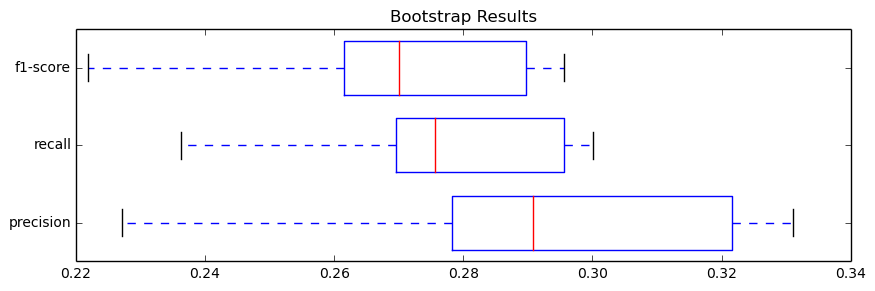

In [287]:
data = [precision, recall, f1]

plt.figure(figsize=(10, 3))
plt.title('Bootstrap Results')

box_res = plt.boxplot(data, vert=False, widths=0.7)
plt.yticks(np.arange(3)+1, ['precision', 'recall', 'f1-score'], rotation=0, ha='right')
plt.show() 

In [ ]:
data = []
for clf_name in scores.keys():
    data.append(f1_scores[clf_name])

plt.figure(figsize=(10, 3))
plt.title('f1-score')
f1_box_res = plt.boxplot(data, vert=False, widths=0.7, meanline=True)
lables = np.append(['f1-score'],corpus.cats[:])
plt.yticks(np.arange(3)+1, list(scores.keys()), rotation=0, ha='right')
plt.show() 

In [192]:
Y = []
Y_PRED = []
P = []
for i in range(3):
    print(i)
    (X_tr, y_tr), (X_te, y_te) = corpus.simple_split(1/6)
    
    Y += list(y_te)
    FINAL.fit(X_tr, y_tr)
    
    y_pred = np.array(FINAL.predict(X_te), dtype=int)
    P += [ FINAL.predict_proba(X_te) ]
    Y_PRED += list(y_pred)

0
1
2


In [194]:
Y_ = np.array(Y)
Y_PRED_ = np.array(Y_PRED)
P_ = np.concatenate(P)

In [202]:
FINAL.RF.classes_

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.])

In [232]:
Y_ALT = [ np.argsort(P_[i])[-3:] for i in range(len(P_[:,0])) ]

In [233]:
Y_ALT = np.array(Y_ALT)

In [234]:
acc = [Y_[i] in Y_ALT[i] for i in range(len(Y_ALT))]

In [235]:
sum(acc)/len(acc)

0.8544478305035553

In [189]:
P_ = [P_[i, Y_PRED_[i]] for i in range(len(Y_PRED_)) ]

In [160]:
ACC = [accuracy_score(Y_[P_ > x], Y_PRED_[P_ > x]) for x in np.linspace(0,1,51)]
TOT = [len(Y_[P_ > x])/len(Y_PRED_) for x in np.linspace(0,1,51)]

/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


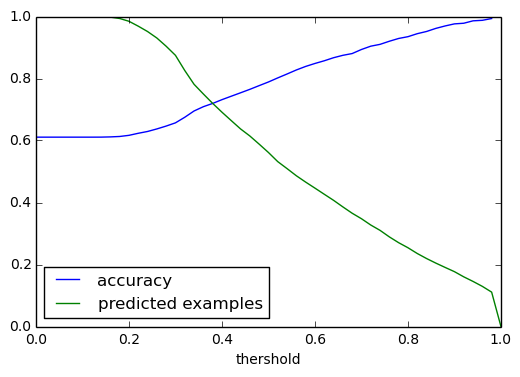

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

acc_plt = plt.plot(np.linspace(0,1,51), ACC, label="accuracy")
tot_plt = plt.plot(np.linspace(0,1,51), TOT, label="predicted examples")
plt.xlabel("thershold")

plt.legend(loc=3)

In [53]:
[accuracy_score(Y_[P_ > x], Y_PRED_[P_ > x]) for x in np.linspace(0,1,51)]

/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0.61079669133652592,
 0.61079669133652592,
 0.61079669133652592,
 0.61079669133652592,
 0.61079669133652592,
 0.61079669133652592,
 0.61079669133652592,
 0.61088534107402037,
 0.61160389704813145,
 0.61296918358405139,
 0.61665438467207079,
 0.62327741162372674,
 0.62909867317370749,
 0.6372992359270232,
 0.64654895666131618,
 0.65693430656934304,
 0.67492532068177824,
 0.69520802377414559,
 0.70903462952215124,
 0.71955645161290327,
 0.73173803526448367,
 0.74284465807297362,
 0.75387067395264118,
 0.76505312868949238,
 0.77701036013813518,
 0.78877973112719757,
 0.80190995907230556,
 0.81452991452991452,
 0.82751417487317214,
 0.83894080996884735,
 0.84850455136540959,
 0.8571428571428571,
 0.86702317290552589,
 0.87476494922903347,
 0.88046068308181091,
 0.89357262103505841,
 0.9042553191489362,
 0.9101544220870379,
 0.92018072289156627,
 0.92914653784219003,
 0.93489434608794975,
 0.94454713493530496,
 0.95168762409000662,
 0.96167494677075938,
 0.96953541507996954,
 0.97621000820

In [81]:
def sigma(p):
    ACC = np.array( [accuracy_score(Y_[P_ > x], Y_PRED_[P_ > x]) for x in np.linspace(0,1,51)] )
    return np.min( np.linspace(0,1,51)[ ACC > p ] )

def tot( sigma ):
    return len(Y_[P_ > sigma])/len(Y_PRED_)

In [72]:
sigma(0.99)

/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


0.97999999999999998

/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000000000001, 0.26000000000000001, 0.29999999999999999, 0.32000000000000001, 0.34000000000000002, 0.38, 0.41999999999999998, 0.44, 0.47999999999999998, 0.52000000000000002, 0.54000000000000004, 0.57999999999999996, 0.62, 0.66000000000000003, 0.70000000000000007, 0.76000000000000001, 0.80000000000000004, 0.83999999999999997, 0.90000000000000002, 0.97999999999999998]


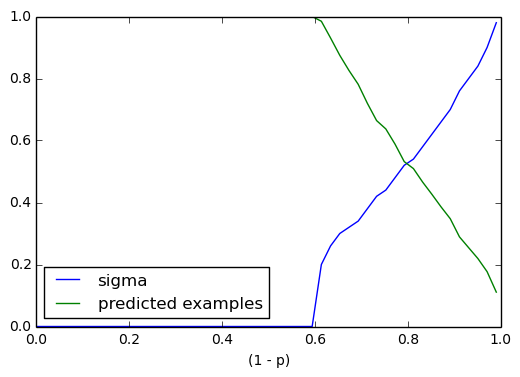

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

sigs = [sigma(p) for p in np.linspace(0,0.99,51)]
tots = [tot(s) for s in sigs]

print(sigs)
acc_plt = plt.plot(np.linspace(0,0.99,51), sigs, label="sigma")
tot_plt = plt.plot(np.linspace(0,0.99,51), tots, label="predicted examples")
plt.xlabel("(1 - p)")

plt.legend(loc=3)

In [89]:
1 - tot(sigma(0.95))

/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mlp_02/virt3_mlp/lib/python3.4/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


0.7807284864315774

In [123]:
def opt_sigma(xy, grid):
    times = np.array( [ (1 - accuracy_score(Y_[P_ > x], Y_PRED_[P_ > x])) * xy + len(Y_[P_ <= x])/len(Y_PRED_)\
               for x in np.linspace(0,0.99,grid)] )
    minn = times.min()
    sig = np.linspace(0,0.99,grid)[ times.argmin() ]
    return minn, sig

In [133]:
opt_sigma(2, 100)

(0.77818025701276405, 0.14999999999999999)

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

grid = 100
sigs = [opt_sigma(xy, grid)[1] for xy in np.linspace(1,10,grid)]
vals = [1 - opt_sigma(xy, grid)[0] for xy in np.linspace(1,10,grid)]

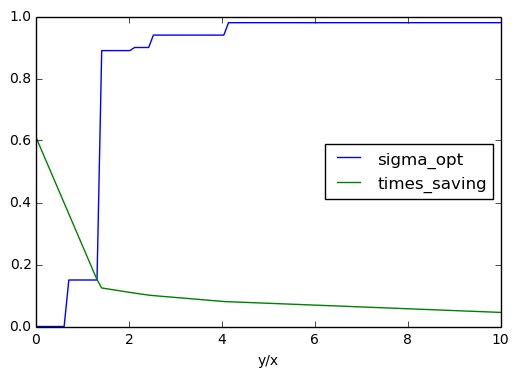

In [135]:
acc_plt = plt.plot(np.linspace(0,10,grid), sigs, label="sigma_opt")
time_plt = plt.plot(np.linspace(0,10,grid), vals, label="times_saving")
plt.xlabel("y/x")

plt.legend(loc=5)